In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

%matplotlib inline

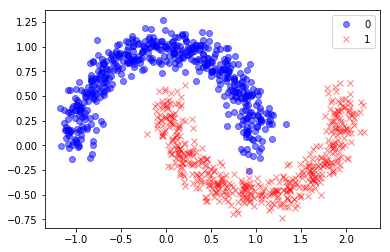

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [4]:
X.shape

(1000, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD, Adam 

/home/qinritukou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [14]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 38us/step


In [15]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.837


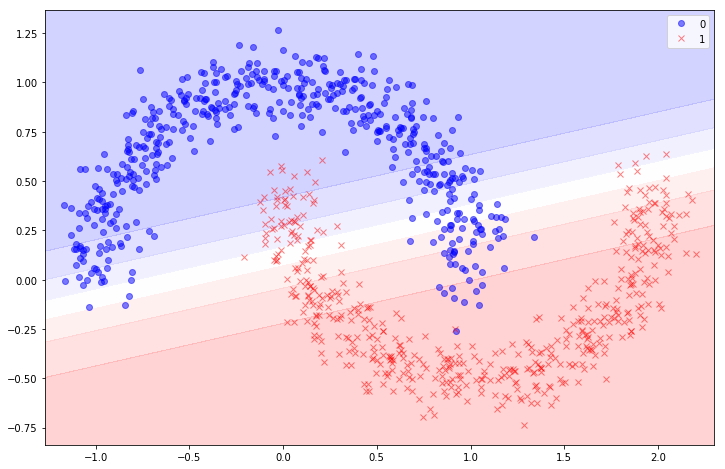

In [16]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

plot_decision_boundary(model, X, y)

In [17]:
model = Sequential() 
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 288us/step - loss: 0.4189 - acc: 0.7986
Epoch 2/100
700/700 [==============================] - 0s 88us/step - loss: 0.2655 - acc: 0.8829
Epoch 3/100
700/700 [==============================] - 0s 86us/step - loss: 0.2508 - acc: 0.8814
Epoch 4/100
700/700 [==============================] - 0s 73us/step - loss: 0.2393 - acc: 0.8957
Epoch 5/100
700/700 [==============================] - 0s 87us/step - loss: 0.2361 - acc: 0.8943
Epoch 6/100
700/700 [==============================] - 0s 76us/step - loss: 0.2229 - acc: 0.8914
Epoch 7/100
700/700 [==============================] - 0s 75us/step - loss: 0.2042 - acc: 0.8957
Epoch 8/100
700/700 [==============================] - 0s 84us/step - loss: 0.1818 - acc: 0.9071
Epoch 9/100
700/700 [==============================] - 0s 75us/step - loss: 0.1365 - acc: 0.9414
Epoch 10/100
700/700 [==============================] - 0s 80us/step - loss: 0.0838 - acc: 0.9757
Epoch 11/100
700/700 [======

700/700 [==============================] - 0s 90us/step - loss: 0.0045 - acc: 0.9971
Epoch 85/100
700/700 [==============================] - 0s 90us/step - loss: 0.0040 - acc: 0.9986
Epoch 86/100
700/700 [==============================] - 0s 87us/step - loss: 0.0129 - acc: 0.9971
Epoch 87/100
700/700 [==============================] - 0s 91us/step - loss: 0.0049 - acc: 0.9971
Epoch 88/100
700/700 [==============================] - 0s 89us/step - loss: 0.0060 - acc: 0.9986
Epoch 89/100
700/700 [==============================] - 0s 89us/step - loss: 0.0074 - acc: 0.9971
Epoch 90/100
700/700 [==============================] - 0s 80us/step - loss: 0.0050 - acc: 0.9971
Epoch 91/100
700/700 [==============================] - 0s 84us/step - loss: 0.0070 - acc: 0.9971
Epoch 92/100
700/700 [==============================] - 0s 82us/step - loss: 0.0041 - acc: 0.9986
Epoch 93/100
700/700 [==============================] - 0s 86us/step - loss: 0.0055 - acc: 0.9971
Epoch 94/100
700/700 [===========

In [20]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 148us/step


[0.0014456542065211882, 1.0]

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test  set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test  set is:	1.000


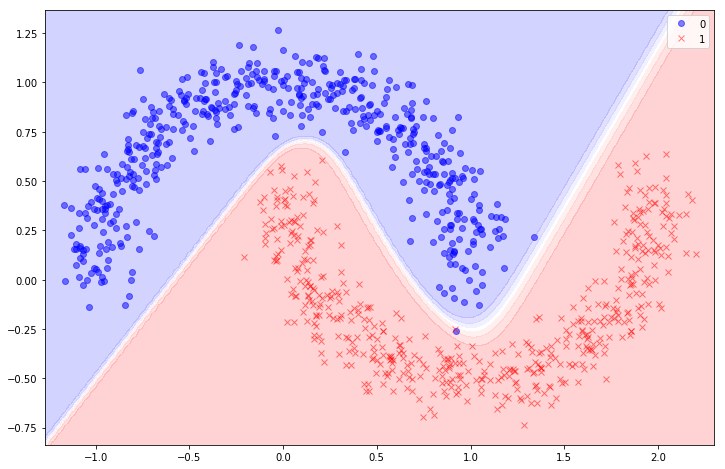

In [23]:
plot_decision_boundary(model, X, y)